In [85]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from datetime import datetime

In [86]:
#importing files in the csv formart
df_ding = pd.read_csv("PRSA_Data_Dingling_20130301-20170228.csv")

In [87]:
df_ding.head()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  3.0  NaN  200.0  82.0  -2.3   
1   2  2013      3    1     1    7.0   7.0  3.0  NaN  200.0  80.0  -2.5   
2   3  2013      3    1     2    5.0   5.0  3.0  2.0  200.0  79.0  -3.0   
3   4  2013      3    1     3    6.0   6.0  3.0  NaN  200.0  79.0  -3.6   
4   5  2013      3    1     4    5.0   5.0  3.0  NaN  200.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1020.8 -19.7   0.0    E   0.5  Dingling  
1  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4  1022.3 -19.4   0.0    N   2.1  Dingling

In [88]:
df_ding.shape

(35064, 18)

In [89]:
df_ding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [90]:
#converting to date column
def convert_to_date(year, month, day, hour):
    return datetime(int(year), int(month), int(day), int(hour))


In [91]:
df_din = pd.read_csv("PRSA_Data_Dingling_20130301-20170228.csv",parse_dates = [['year','month','day','hour']], date_parser = convert_to_date, keep_date_col =True)

C:\Users\User\AppData\Local\Temp\ipykernel_51156\245438062.py:1: FutureWarning:


        Use pd.to_datetime instead.




In [92]:
df_din.head()

year_month_day_hour  No  year month day hour  PM2.5  PM10  SO2  NO2     CO  \
0 2013-03-01 00:00:00   1  2013     3   1    0    4.0   4.0  3.0  NaN  200.0   
1 2013-03-01 01:00:00   2  2013     3   1    1    7.0   7.0  3.0  NaN  200.0   
2 2013-03-01 02:00:00   3  2013     3   1    2    5.0   5.0  3.0  2.0  200.0   
3 2013-03-01 03:00:00   4  2013     3   1    3    6.0   6.0  3.0  NaN  200.0   
4 2013-03-01 04:00:00   5  2013     3   1    4    5.0   5.0  3.0  NaN  200.0   

     O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
0  82.0  -2.3  1020.8 -19.7   0.0    E   0.5  Dingling  
1  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4  81.0  -3.5  1022.3 -19.4   0.0    N   2.1  Dingling

In [93]:
df_din.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year_month_day_hour  35064 non-null  datetime64[ns]
 1   No                   35064 non-null  int64         
 2   year                 35064 non-null  object        
 3   month                35064 non-null  object        
 4   day                  35064 non-null  object        
 5   hour                 35064 non-null  object        
 6   PM2.5                34285 non-null  float64       
 7   PM10                 34408 non-null  float64       
 8   SO2                  34334 non-null  float64       
 9   NO2                  33830 non-null  float64       
 10  CO                   33052 non-null  float64       
 11  O3                   33850 non-null  float64       
 12  TEMP                 35011 non-null  float64       
 13  PRES                 35014 non-

In [94]:
df_din['month'] = pd.to_numeric(df_din['month'])

In [95]:
print("rows : ",df_din.shape[0])
print("columns: ",df_din.shape[1])
print("\n features: \n",df_din.columns.tolist())
print("\n missing_values",df_din.isnull().any())
print("\n nunique values: \n",df_din.nunique())

rows :  35064
columns:  19

 features: 
 ['year_month_day_hour', 'No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']

 missing_values year_month_day_hour    False
No                     False
year                   False
month                  False
day                    False
hour                   False
PM2.5                   True
PM10                    True
SO2                     True
NO2                     True
CO                      True
O3                      True
TEMP                    True
PRES                    True
DEWP                    True
RAIN                    True
wd                      True
WSPM                    True
station                False
dtype: bool

 nunique values: 
 year_month_day_hour    35064
No                     35064
year                       5
month                     12
day                       31
hour                      24
PM2.5                  

In [96]:
df_din.describe()

No         month         PM2.5          PM10           SO2  \
count  35064.000000  35064.000000  34285.000000  34408.000000  34334.000000   
mean   17532.500000      6.522930     65.989497     83.739723     11.749650   
std    10122.249256      3.448752     72.267723     79.541685     15.519259   
min        1.000000      1.000000      3.000000      2.000000      0.285600   
25%     8766.750000      4.000000     14.000000     26.000000      2.000000   
50%    17532.500000      7.000000     41.000000     60.000000      5.000000   
75%    26298.250000     10.000000     93.000000    117.000000     15.000000   
max    35064.000000     12.000000    881.000000    905.000000    156.000000   

                NO2            CO            O3          TEMP          PRES  \
count  33830.000000  33052.000000  33850.000000  35011.000000  35014.000000   
mean      27.585467    904.896073     68.548371     13.686111   1007.760278   
std       26.383882    903.306220     53.764424     11.365313     10.225664   
min        1.026500    100.000000      0.214200    -16.600000    982.400000   
25%        9.000000    300.000000     31.000000      3.400000    999.300000   
50%       19.000000    600.000000     61.000000     14.700000   1007.400000   
75%       38.000000   1200.000000     90.000000     23.300000   1016.000000   
max      205.000000  10000.000000    500.000000     41.400000   1036.500000   

               DEWP          RAIN          WSPM  
count  35011.000000  35013.000000  35021.000000  
mean       1.505495      0.060366      1.853836  
std       13.822099      0.752899      1.309808  
min      -35.100000      0.000000      0.000000  
25%      -10.200000      0.000000      1.000000  
50%        1.800000      0.000000      1.500000  
75%       14.200000      0.000000      2.300000  
max       27.200000     52.100000     10.000000

In [97]:
df_unindex = df_din.copy()
df_unindex.head()

year_month_day_hour  No  year  month day hour  PM2.5  PM10  SO2  NO2     CO  \
0 2013-03-01 00:00:00   1  2013      3   1    0    4.0   4.0  3.0  NaN  200.0   
1 2013-03-01 01:00:00   2  2013      3   1    1    7.0   7.0  3.0  NaN  200.0   
2 2013-03-01 02:00:00   3  2013      3   1    2    5.0   5.0  3.0  2.0  200.0   
3 2013-03-01 03:00:00   4  2013      3   1    3    6.0   6.0  3.0  NaN  200.0   
4 2013-03-01 04:00:00   5  2013      3   1    4    5.0   5.0  3.0  NaN  200.0   

     O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
0  82.0  -2.3  1020.8 -19.7   0.0    E   0.5  Dingling  
1  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4  81.0  -3.5  1022.3 -19.4   0.0    N   2.1  Dingling

In [98]:
df_din = df_din.set_index("year_month_day_hour")

In [99]:
df_din.head()

No  year  month day hour  PM2.5  PM10  SO2  NO2     CO  \
year_month_day_hour                                                           
2013-03-01 00:00:00   1  2013      3   1    0    4.0   4.0  3.0  NaN  200.0   
2013-03-01 01:00:00   2  2013      3   1    1    7.0   7.0  3.0  NaN  200.0   
2013-03-01 02:00:00   3  2013      3   1    2    5.0   5.0  3.0  2.0  200.0   
2013-03-01 03:00:00   4  2013      3   1    3    6.0   6.0  3.0  NaN  200.0   
2013-03-01 04:00:00   5  2013      3   1    4    5.0   5.0  3.0  NaN  200.0   

                       O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
year_month_day_hour                                                       
2013-03-01 00:00:00  82.0  -2.3  1020.8 -19.7   0.0    E   0.5  Dingling  
2013-03-01 01:00:00  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2013-03-01 02:00:00  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2  Dingling  
2013-03-01 03:00:00  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0  Dingling  
2013-03-01 04:00:00  81.0  -3.5  1022.3 -19.4   0.0    N   2.1  Dingling

In [100]:
df_2013_2015 = df_din.loc['2013':'2015']
df_2013_2015.head()

No  year  month day hour  PM2.5  PM10  SO2  NO2     CO  \
year_month_day_hour                                                           
2013-03-01 00:00:00   1  2013      3   1    0    4.0   4.0  3.0  NaN  200.0   
2013-03-01 01:00:00   2  2013      3   1    1    7.0   7.0  3.0  NaN  200.0   
2013-03-01 02:00:00   3  2013      3   1    2    5.0   5.0  3.0  2.0  200.0   
2013-03-01 03:00:00   4  2013      3   1    3    6.0   6.0  3.0  NaN  200.0   
2013-03-01 04:00:00   5  2013      3   1    4    5.0   5.0  3.0  NaN  200.0   

                       O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
year_month_day_hour                                                       
2013-03-01 00:00:00  82.0  -2.3  1020.8 -19.7   0.0    E   0.5  Dingling  
2013-03-01 01:00:00  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2013-03-01 02:00:00  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2  Dingling  
2013-03-01 03:00:00  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0  Dingling  
2013-03-01 04:00:00  81.0  -3.5  1022.3 -19.4   0.0    N   2.1  Dingling

In [101]:
pm_data = df_din['PM2.5']
pm_data.head()

year_month_day_hour
2013-03-01 00:00:00    4.0
2013-03-01 01:00:00    7.0
2013-03-01 02:00:00    5.0
2013-03-01 03:00:00    6.0
2013-03-01 04:00:00    5.0
Name: PM2.5, dtype: float64

<AxesSubplot:xlabel='year_month_day_hour'>

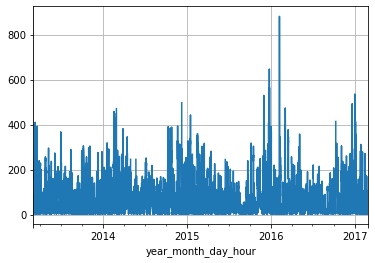

In [102]:
pm_data.plot(grid=True)

C:\Users\User\AppData\Local\Temp\ipykernel_51156\3818900720.py:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



<AxesSubplot:xlabel='year_month_day_hour'>

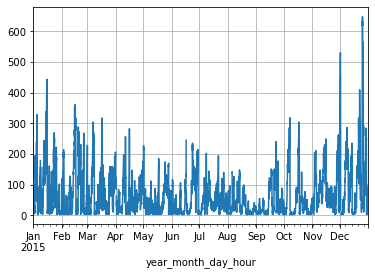

In [103]:
aq_2015 = df_din['2015']
aq_2015.head()
pm_aq_2015 = aq_2015['PM2.5']
pm_aq_2015.plot(grid=True)

C:\Users\User\AppData\Local\Temp\ipykernel_51156\3980341972.py:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



<AxesSubplot:xlabel='year_month_day_hour'>

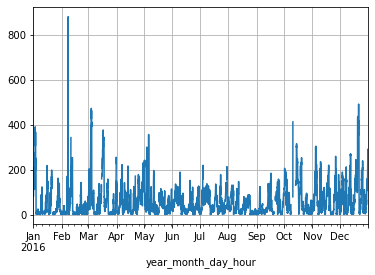

In [104]:
aq_2016 = df_din['2016']
pm_aq_2016 = aq_2016['PM2.5']
pm_aq_2016.plot(grid=True)

In [107]:
import plotly.express as px
import os
fig = px.line(df_unindex,x='year_month_day_hour',y='PM2.5',title = 'PM 2.5 with slider')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [106]:
fig = px.line(df_unindex,x='year_month_day_hour',y = 'PM2.5',title = 'PM 2.5 with slider')
fig.update_xaxes(rangeslider_visible=True,rangeselector=dict(buttons=list([dict(count=1,label='1y',stepmode="backward"),
                                                                         dict(count=2,label='2y',stepmode="backward"),
                                                                         dict(count=3,label='3y',stepmode="backward"),
                                                                         dict(step='all')])))
fig.show()